In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ======== 파라미터 ========
training_steps = 22000
display_step = 1000

In [3]:
# ======== 학습데이터 ========
# 학습시간
X = np.array([54, 8, 30, 24, 46, 12, 20, 37, 40, 48])
# 토익점수
Y = np.array([800, 320, 600, 630, 700, 680, 730, 720, 700, 920])
# 샘플 갯수
n_samples = X.shape[0]

print("샘플수: %i" % (n_samples))

샘플수: 10


In [4]:
# ======== W, B 초기값 설정 =========
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [5]:
# ======== Linear Regression 에서 학습될 가설 ========
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

In [6]:
# ======== Linear Regression 에서 학습될 가설의 Cost Function ========
# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true)) 

In [7]:
# ======== Gradient Descent Algorithm 에서 Step ========
learning_rate = 0.0008

In [8]:
# ======== 텐서플로우에 내장된 GradientDescentOptimizer ========
# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [9]:
# ======== GradientDescentOptimizer ========
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation. : 자동 미분
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        cost = mean_square(pred, Y)

    # Compute gradients.
    # gradients = g.gradient(cost, [W, b])
    
    # Update W and b following gradients.
    # optimizer.apply_gradients(zip(gradients, [W, b]))
    
    weight, bias = g.gradient(cost, [W, b])
    W.assign_sub(learning_rate * weight)
    b.assign_sub(learning_rate * bias)

In [10]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        cost = mean_square(pred, Y)
        print("step: %i, cost: %f, W: %f, b: %f" % (step, cost, W.numpy(), b.numpy()))
        #print("예측값 : {}".format(pred.numpy()))
        
        '''
        print("cost type: {}".format(type(cost)))
        print("W type: {}".format(type(W)))
        print("b type: {}".format(type(b)))
        print("pred type: {}".format(type(pred)))
        '''

step: 1000, cost: 31210.353516, W: 15.899635, b: 111.834084
step: 2000, cost: 22141.888672, W: 13.714158, b: 196.699188
step: 3000, cost: 17020.007812, W: 12.071699, b: 260.478210
step: 4000, cost: 14127.142578, W: 10.837334, b: 308.410583
step: 5000, cost: 12493.256836, W: 9.909669, b: 344.433197
step: 6000, cost: 11570.454102, W: 9.212499, b: 371.504944
step: 7000, cost: 11049.247070, W: 8.688556, b: 391.850403
step: 8000, cost: 10754.870117, W: 8.294794, b: 407.140778
step: 9000, cost: 10588.603516, W: 7.998871, b: 418.631897
step: 10000, cost: 10494.697266, W: 7.776475, b: 427.267731
step: 11000, cost: 10441.660156, W: 7.609344, b: 433.757965
step: 12000, cost: 10411.705078, W: 7.483730, b: 438.635468
step: 13000, cost: 10394.786133, W: 7.389338, b: 442.301147
step: 14000, cost: 10385.228516, W: 7.318388, b: 445.056030
step: 15000, cost: 10379.831055, W: 7.265069, b: 447.126434
step: 16000, cost: 10376.780273, W: 7.225002, b: 448.682312
step: 17000, cost: 10375.059570, W: 7.194886,

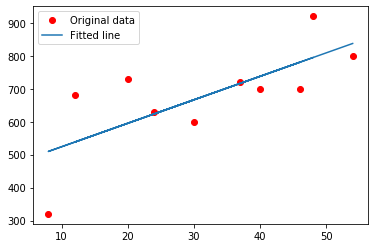

In [11]:
# ======== 학습된 최적의 그래프 그리기 ========
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [12]:
# ======== 학습된 우리의 프로그램에 예측 문의 ========

# 10 시간 공부한 경우 토익점수 예측
print ("10시간: %f 점" % (linear_regression(10).numpy()))
# 40 시간 공부한 경우 토익점수 예측
print ("40시간: %f 점" % (linear_regression(40).numpy()))

10시간: 523.796387 점
40시간: 737.566284 점
